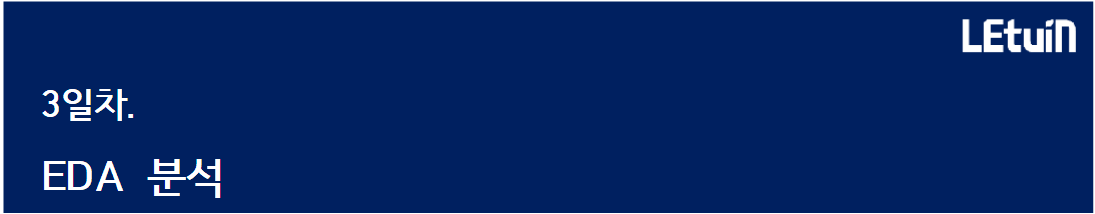

# 과제 제출 방법
* 각 code 셀의 output이 보여지는 상태로 제출하기
* PDF 파일로 제출
    * PDF 파일 생성 방법 : 파일>인쇄>저장
* 과제 업로드 위치 :  https://cafe.naver.com/letuin > 렛유인 수강후기 > 과제|반도체데이터분석
* 과제 기한: 다음 수업 전까지

# * **[주의사항]**
#    * **출력물이 잘리는 경우 문제1(for문)은 출력물을 닫고 pdf로 인쇄**하면 됩니다.

# 코드 실행 방법
file 경로 수정 목차에서 경로 수정 후 실행해야 합니다.

* 패키지 import

In [1]:
import pandas               as pd
import numpy                as np

import matplotlib.pyplot    as plt # 시각화 패키지
import seaborn              as sns # 시각화 패키지

import scipy.stats          as stats

In [2]:
import warnings  # warnings 제어
warnings.filterwarnings(action='ignore') # warnings 무시
# warnings.filterwarnings(action='default') # warnings 표기

# 구글드라이브 권한 할당
* 구글드라이브에 있는 엑셀파일에 접근할 수 있는 권한을 할당함
* 아래 코드 실행 후 > 계정선택 > 허용

In [3]:
#구글드라이브 권한할당 코드는 모든 파일에서 동일
from google.colab import drive
drive.mount('/content/drive')
# '/content/drive' 폴더에 해당 구글드라이브의 파일 및 폴더를 접근할 수 있도록 함

Mounted at /content/drive


# file 경로 수정
* EX1~EX5 엑셀파일의 경로를 정보를 변수에 할당
* file_path_name 변수값을 본인계정의 엑셀파일경로로 수정

* 경로 찾는 방법
    * 왼쪽 폴더 아이콘 > drive > MyDrive 폴더로 들어가기
    * xlsx 파일을 찾은 후, 해당 파일의 오른쪽 점 세 개 클릭
    * 경로복사 클릭
    * 아래 file_path_name 변수에 경로 붙여넣기


In [4]:
file_num = 3
file_path = '/content/drive/MyDrive/LetUin'
file_path_name = f'{file_path}/Raw data_ref_C_EX{file_num}.xlsx'

* 엑셀 데이터 읽기
    * 경로는 개인계정의 엑셀파일 경로로 수정해야합니다.
    * 경로확인방법 : 오른쪽 폴더 아이콘 > drive > content ....

In [5]:
df3_all = pd.read_excel(file_path_name # 파일 경로
                        , sheet_name = [0,1,2,3,4] # 시트정보
                        )

* 데이터 전처리

* df3y: Yield 시트

In [6]:
df3y = df3_all[0]

In [7]:
for i in range(3,len(df3y.columns)):
    df3y = df3y.rename(columns={df3y.columns[i] : df3y.columns[i] + '_' + df3y.iloc[0,i]})

In [8]:
df3y=df3y.drop(index=[0])

In [9]:
df3y[['No.','LOTID','WFID']] = df3y[['No.','LOTID','WFID']].astype('object')
for col in df3y.columns[3:]:
    df3y[col] = pd.to_numeric(df3y[col])

* df3e : ET(DC) 시트


In [10]:
df3e = df3_all[1]

In [11]:
df3e = df3e.drop(index=[0], axis=0)

In [12]:
df3e[df3e.columns[:3]] = df3e[df3e.columns[:3]].astype('object')
for col in df3e.columns[3:]:           # for 문에서 마지막 번호는 +1로 적용해야함
    df3e[col] = pd.to_numeric(df3e[col])   #to_numeric은 pandas 함수

* df3a : ADI_ACI CD 시트

* 데이터 확인

In [13]:
df3a = df3_all[2]

In [14]:
for i in range(len(df3a.columns)):
    # print(i)
    # print(df3a.columns[i])
    if df3a.columns[i][:7] == 'Unnamed':
        df3a = df3a.rename(columns={df3a.columns[i]:df3a.columns[i-1]})

In [15]:
collist = []
for i  in range(3, len(df3a.columns)):
    collist.append(f'{df3a.columns[i]}_{df3a.iloc[0,i]}')

In [16]:
df3a.columns = list(df3a.columns[:3]) + collist

* 불필요한 행 삭제

In [17]:
df3a=df3a.drop(index=[0])

In [18]:
df3a.iloc[:,:3] = df3a.iloc[:,:3].astype('object')
for col in df3a.columns[3:]:           # for 문에서 마지막 번호는 +1로 적용해야함
    df3a[col] = pd.to_numeric(df3a[col])   #to_numeric은 pandas 함수

* df3f : FDC 시트

In [19]:
df3f = df3_all[4]

In [20]:
for i in range(len(df3f.columns)):
    if df3f.columns[i][:7] != 'Unnamed':
        pass
    else:
        df3f.rename(columns={df3f.columns[i]:df3f.columns[i-1]},inplace=True)

* 2단계 : DataFrame의 첫번째 행에 text를 column명과 결합  

In [21]:
collist = [ f'{df3f.columns[i]}_{df3f.iloc[0,i]}' for i in range(3, len(df3f.columns))]

In [22]:
df3f.columns = list(df3f.columns[:3]) + collist

* 불필요한 행 삭제

In [23]:
df3f=df3f.drop(index=[0])

In [24]:
colnames = df3f.columns[df3f.columns.str.contains(pat= 'No.|LOTID|WFID|EQP|CHAID|LOC')]

In [25]:
for col in df3f:
    if col in colnames:
        df3f[col] = df3f[col].astype('object')
    else:
        df3f[col] = pd.to_numeric(df3f[col])

* df3t : Thickness 시트

In [26]:
df3t = df3_all[3]

In [27]:
for i in range(len(df3t.columns)):
    if df3t.columns[i][:7] == 'Unnamed':
        df3t.rename(columns={df3t.columns[i]:df3t.columns[i-1]},inplace=True)

In [28]:
collist = [ f'{df3t.columns[i]}_{df3t.iloc[0,i]}' for i in range(3, len(df3t.columns))]

In [29]:
df3t.columns = list(df3t.columns[:3]) + collist

* 불필요한 행 삭제

In [30]:
df3t=df3t.drop(index=[0])

In [31]:
df3t.iloc[:,:3] = df3t.iloc[:,:3].astype('object')
for col in df3t.columns[3:]:           # for 문에서 마지막 번호는 +1로 적용해야함
    df3t[col] = pd.to_numeric(df3t[col])   #to_numeric은 pandas 함수

In [36]:
for inx in range(len(df3f.columns)-1):
    # print(inx)
    # print(df3f.columns[inx].split('_'))
    # print(df3f.columns[inx].split('_')[-1])
    text1 = df3f.columns[inx].split('_')[-1] # EQPID를 판별할 변수
    text2 = df3f.columns[inx+1].split('_')[-1] # 바로 다음에 오는 CHAID 또는 LOC를 판별할 변수

    if (text1 == 'EQPID') and ((text2 == 'CHAID') or (text2 == 'LOC')):
        # print(text1, text2)
        # print(df3f.columns[inx]+'_'+text2)
        print(df3f.columns[inx]+'_'+text2)
        new_col = df3f.columns[inx]+'_'+text2
        df3f[new_col]=df3f[df3f.columns[inx]]+'_' + df3f[df3f.columns[inx+1]].astype(str)


Active_SIN_DEPO_EQPID_LOC
Active_STI_ETCH_EQPID_CHAID
Active_HDP_DEPO_EQPID_CHAID
DGOX_DGOX_DEPO_EQPID_LOC
DGOX_GOX_DEPO_EQPID_LOC
GPOLY_GPY_ETCH_EQPID_CHAID
GPOLY_GPOX_DEPO_EQPID_LOC
Spacer_Spacer_SIN_DEPO_EQPID_LOC
Spacer_Spacer_SIN_ETCH_EQPID_CHAID
SD Anneal_RTA_EQPID_CHAID
ILD_HDP_DEPO_EQPID_CHAID
Metal-1_M1_ETCH_EQPID_CHAID


# 탐색적 자료 분석(EDA)

# 문제1) Yield~FDC sheet의 모든 trend를 확인하여라.
* 각 시트별 trend를 확인할 수 있는 line chart를 for 문으로 시각화하고
* 각 시트별 이상 trend를 보이는 columns을 확인하여라.
    * 이상 trend가 없는 sheet도 존재함.

## 1-1) 시트별 Trend 그래프 : df3y
* 예시: for문으로 df3y 의 모든 columns의 parameter의 값을 linechart로 시각화하여, 트랜드를 확인해보면, 각 parameter들이 동일한 구간에서 이상 trend를 보이고 있는 것을 확인할 수 있다.

In [ ]:
# 정답 기입 - 제출시 출력물은 숨기기(ctrl+M+O) 후 pdf로 제출
for col in df3y.columns[3:]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3y[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

Output hidden; open in https://colab.research.google.com to view.

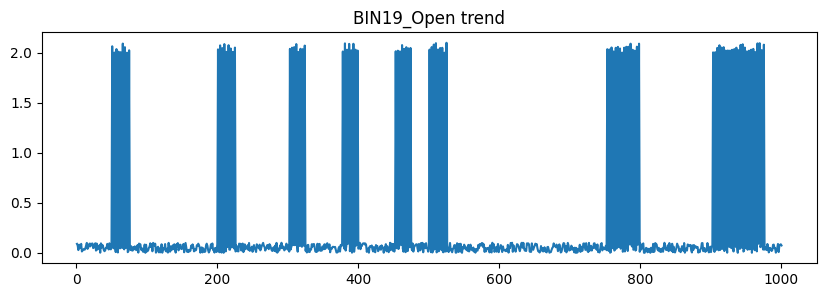

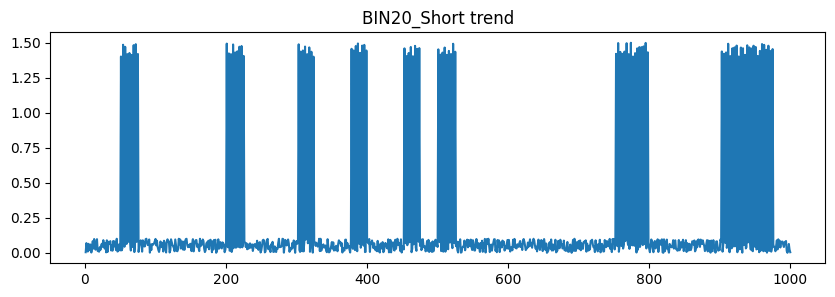

In [ ]:
# 이상 trend를 보이는 column명 기입
# BIN19, 20
for col in df3y.columns[[21,22]]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3y[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

## 1-2) 시트별 Trend 그래프 : df3e

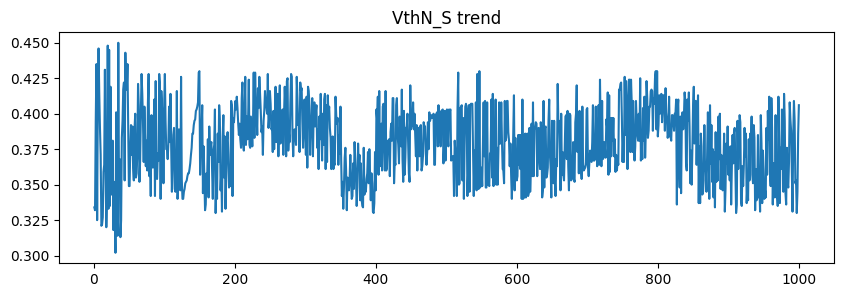

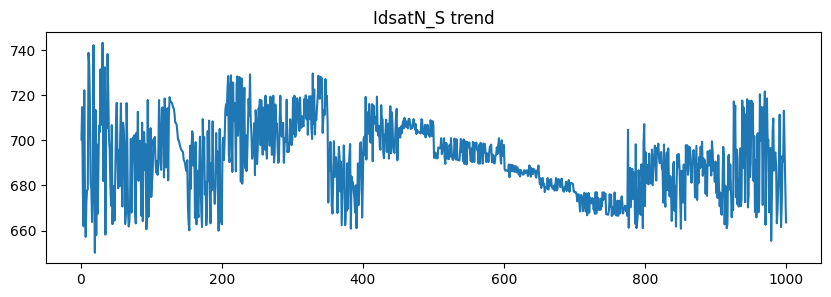

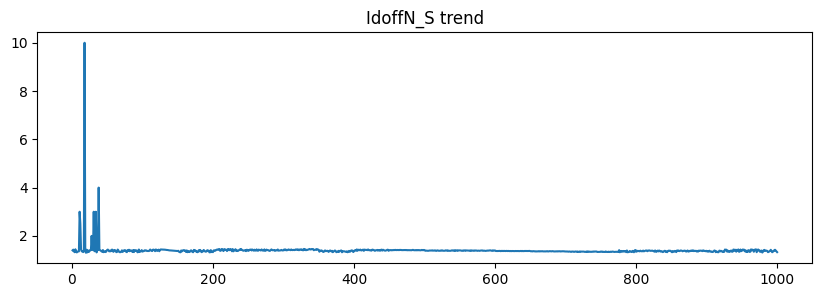

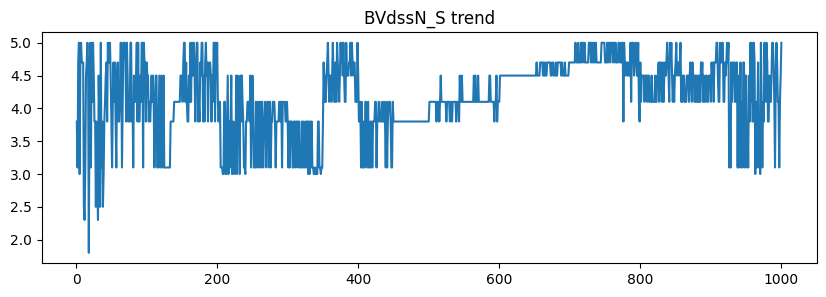

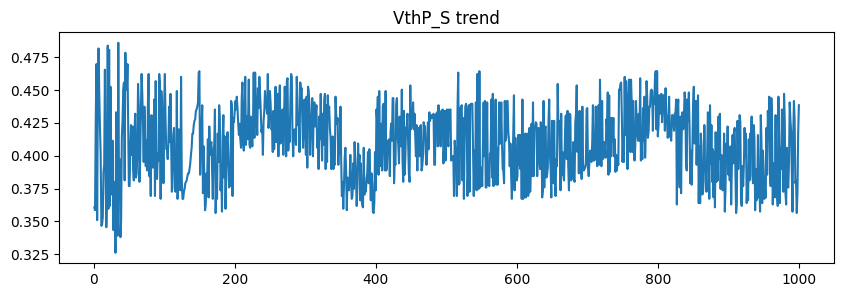

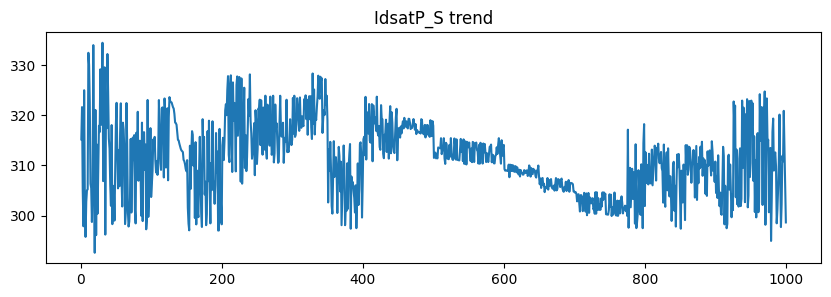

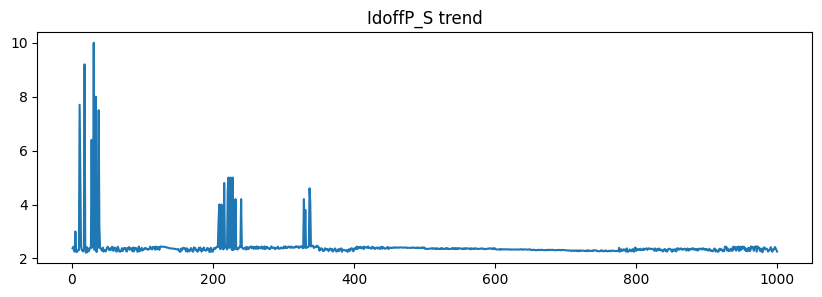

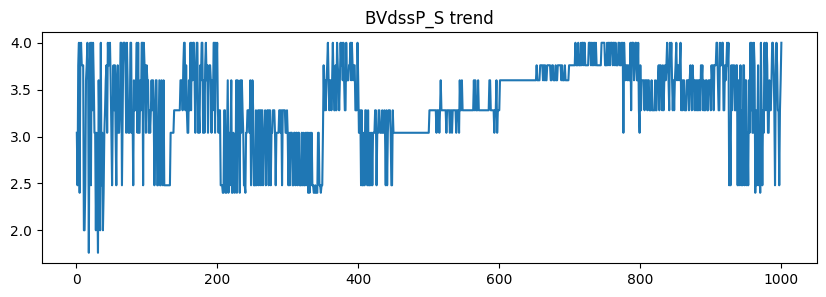

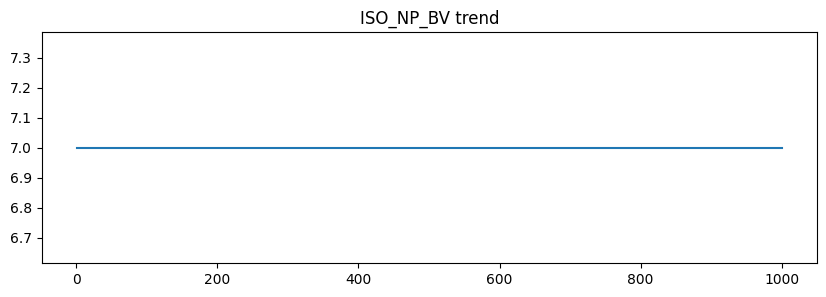

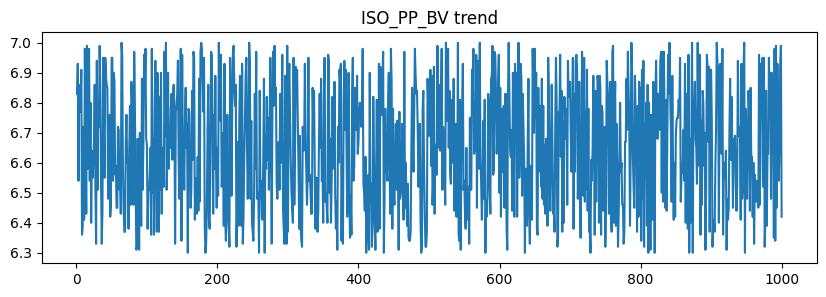

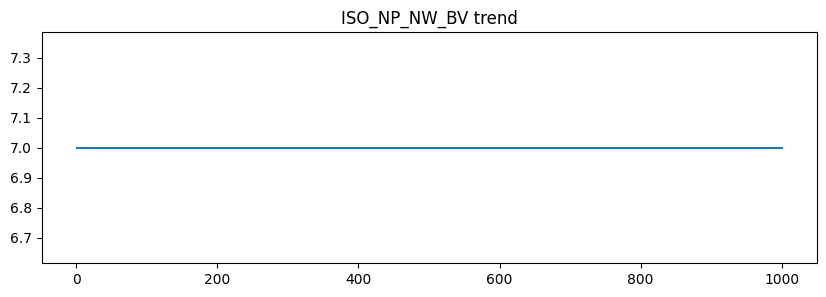

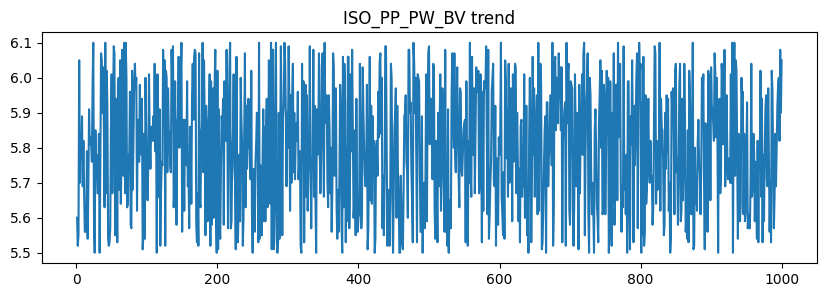

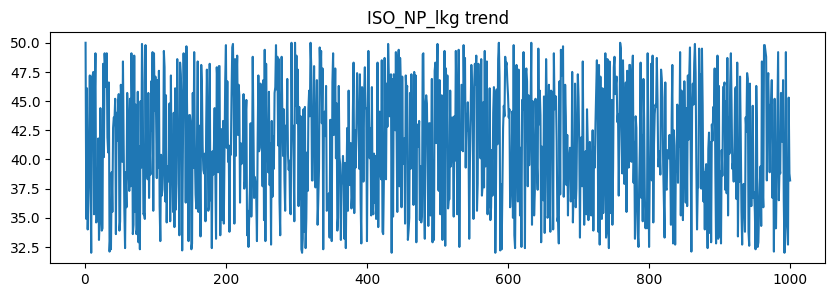

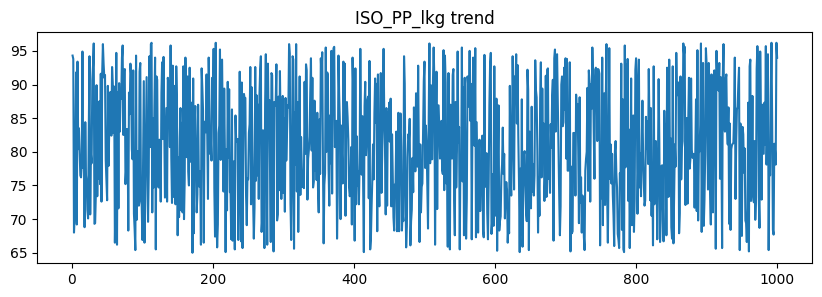

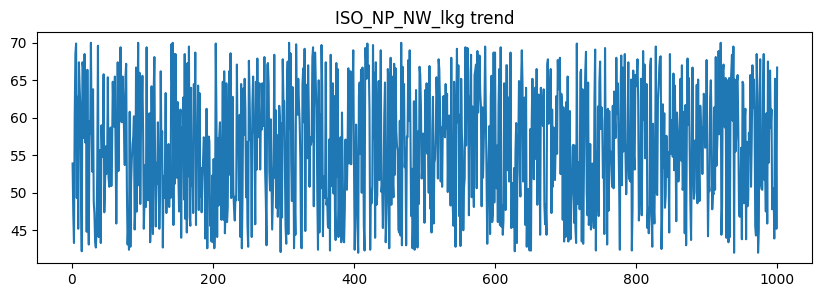

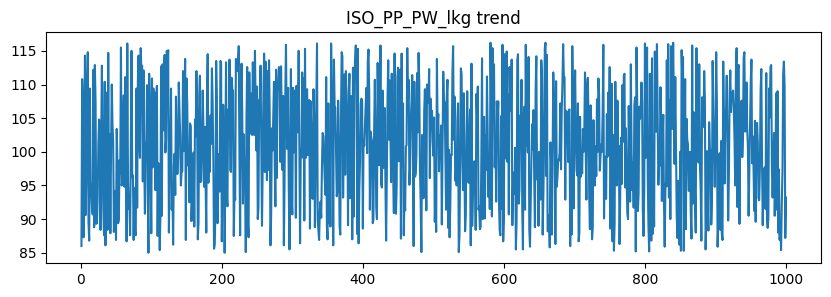

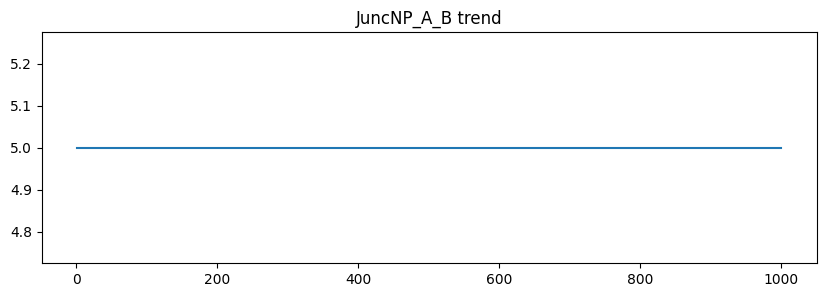

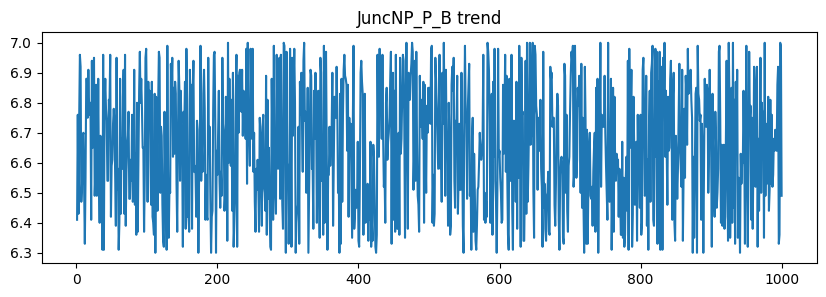

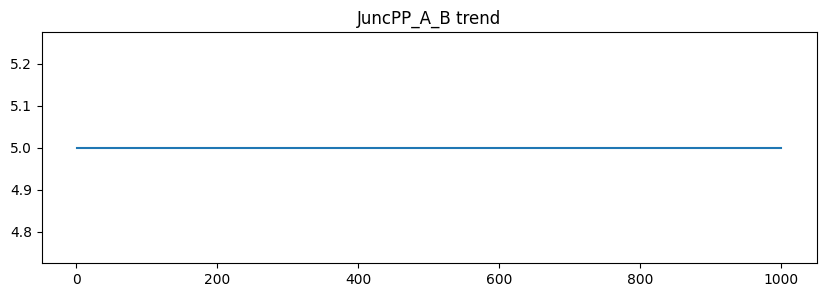

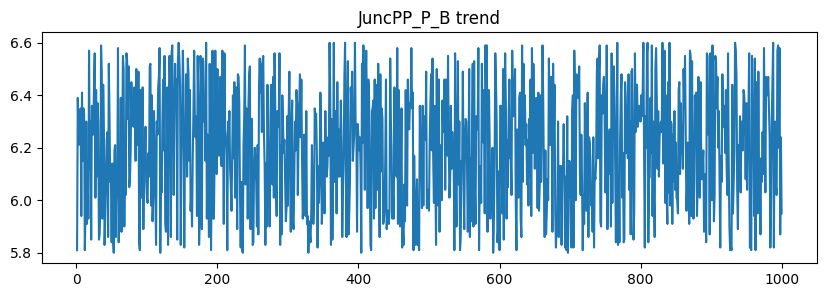

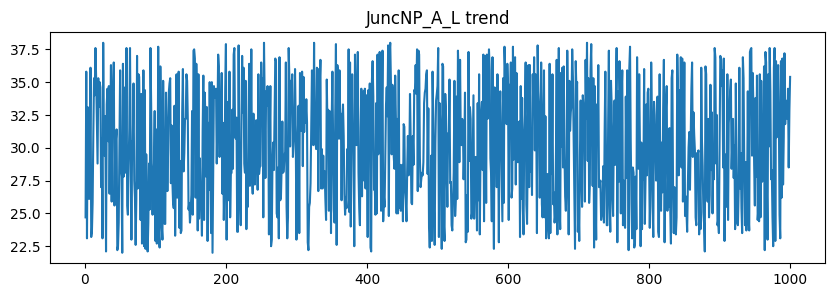

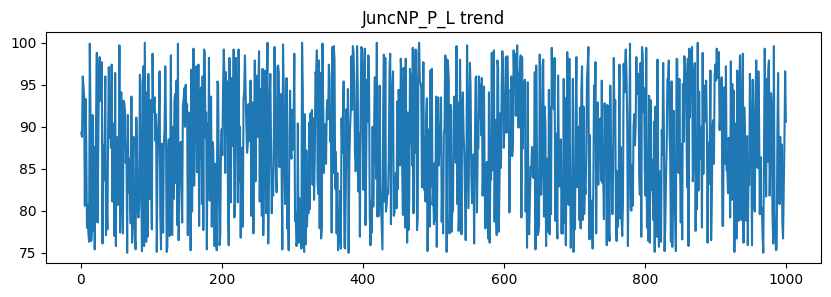

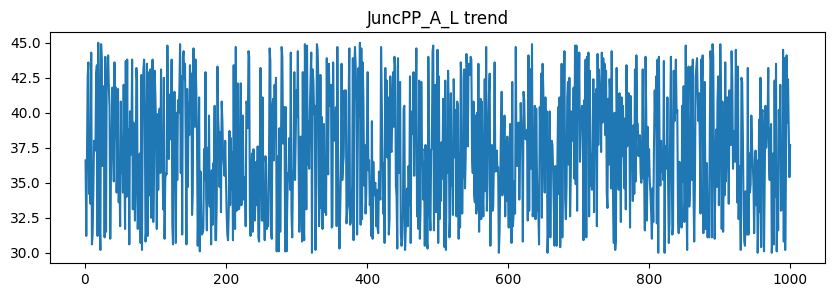

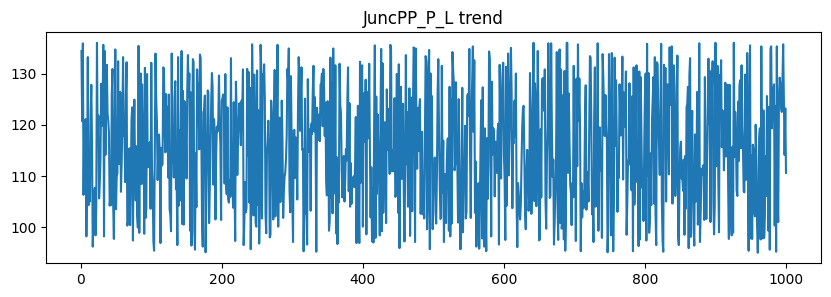

In [ ]:
# 정답 기입 - 제출시 출력물은 숨기기(ctrl+M+O) 후 pdf로 제출
for col in df3e.columns[3:]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3e[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

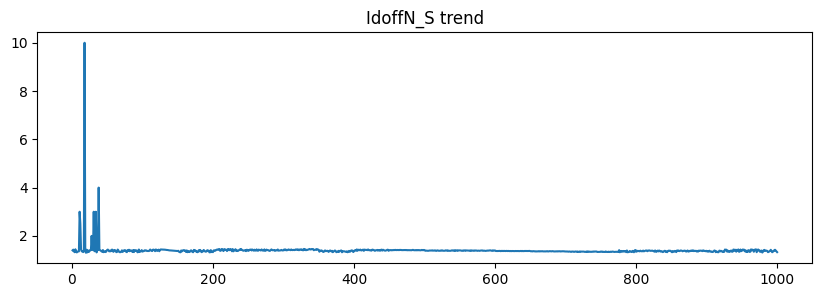

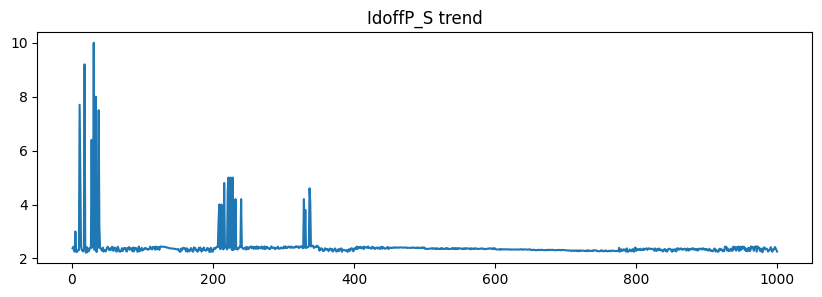

In [ ]:
# 이상 trend를 보이는 column명 기입
#
for col in df3e.columns[[5,9]]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3e[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

## 1-3) 시트별 Trend 그래프 : df3a

In [ ]:
# 정답 기입 - 제출시 출력물은 숨기기(ctrl+M+O) 후 pdf로 제출
for col in df3a.columns[3:]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3a[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# 이상 trend를 보이는 column명 기입


## 1-4) 시트별 Trend 그래프 : df3t

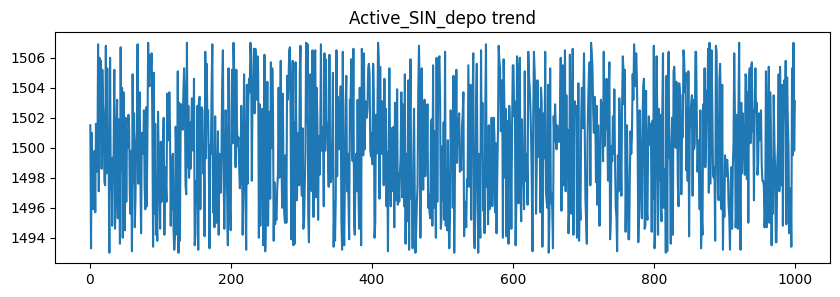

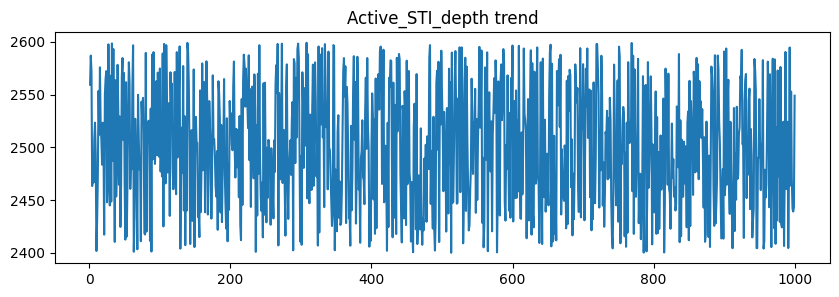

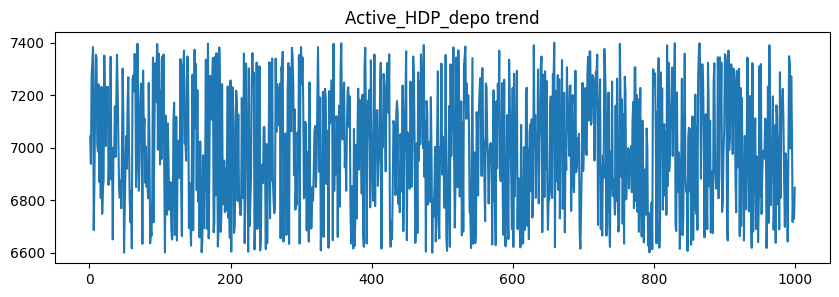

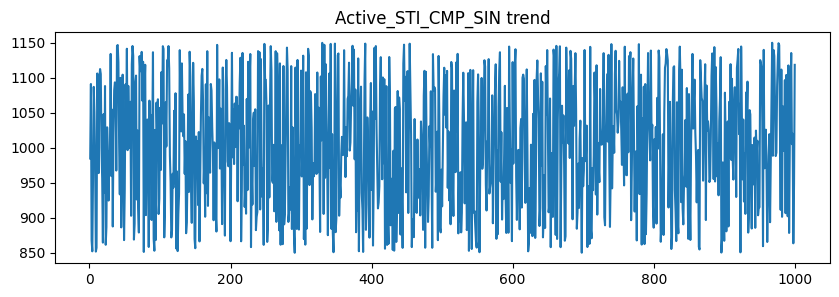

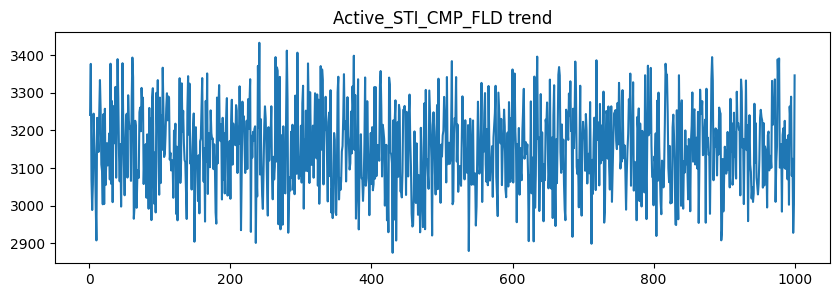

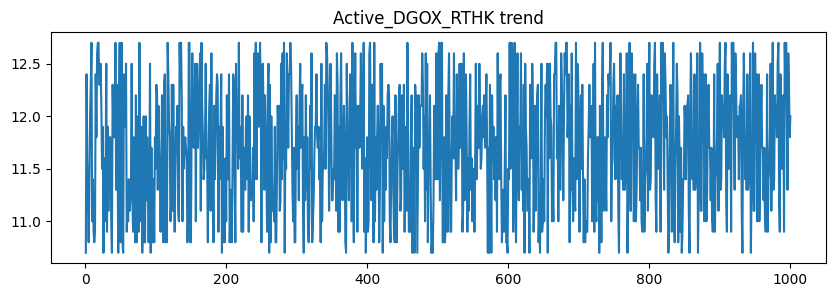

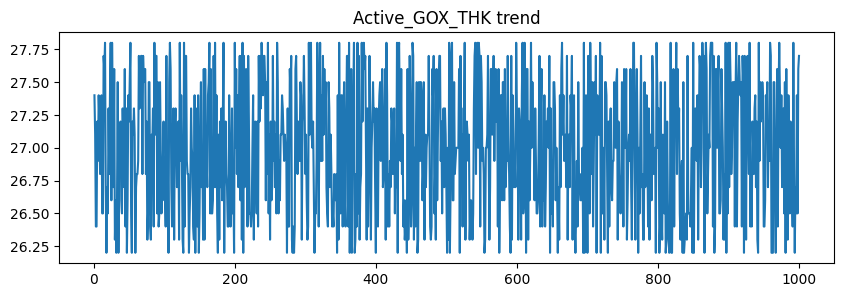

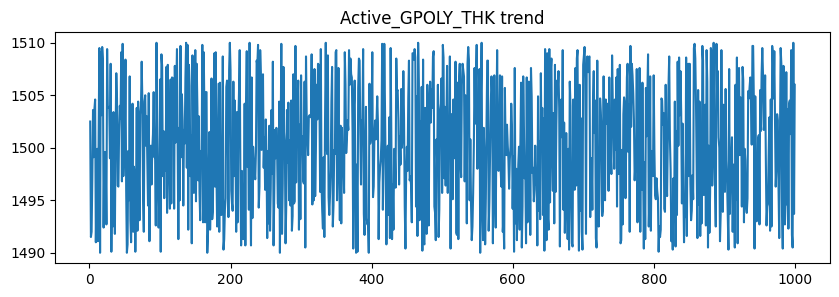

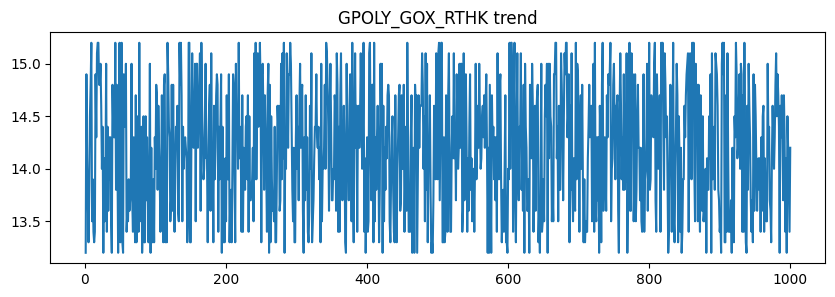

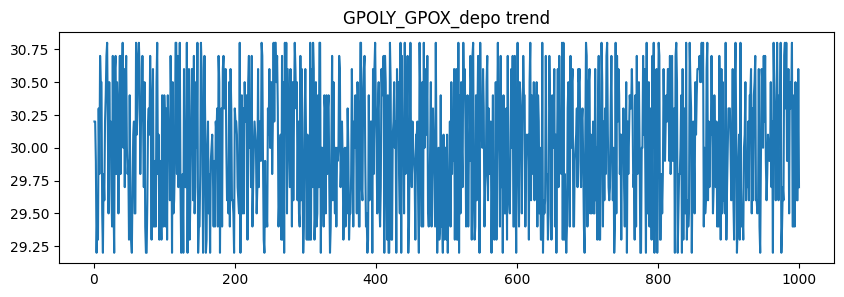

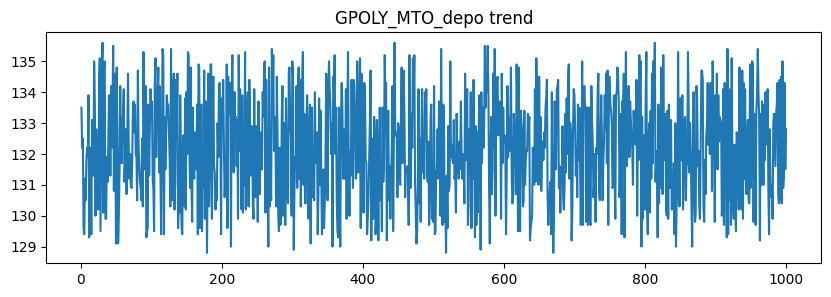

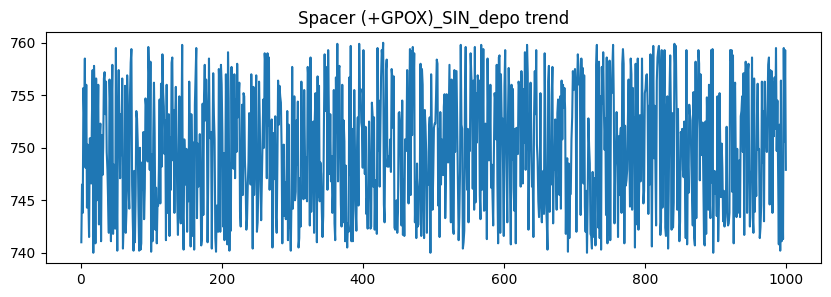

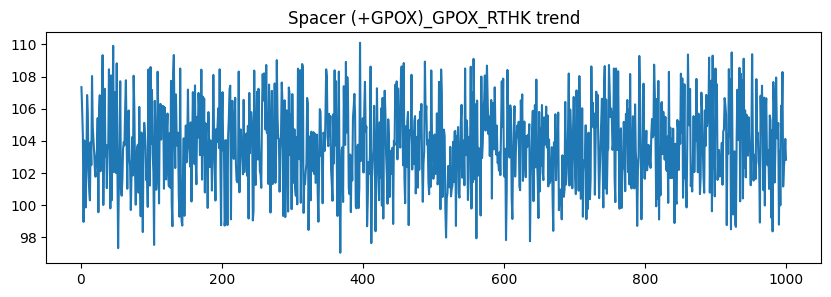

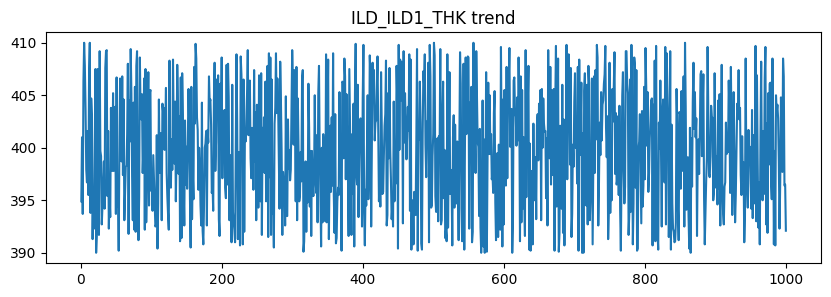

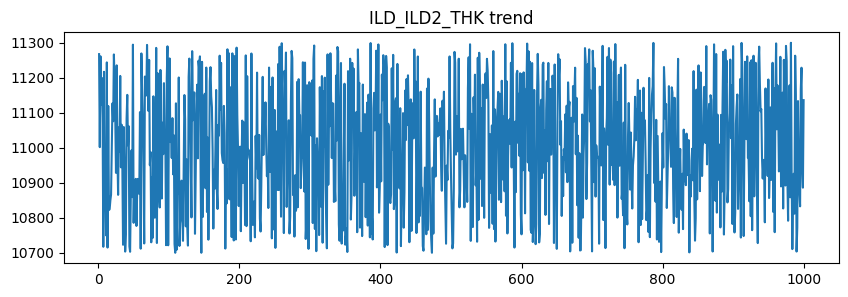

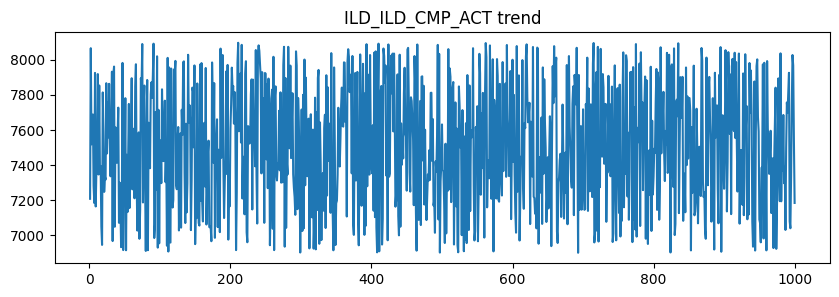

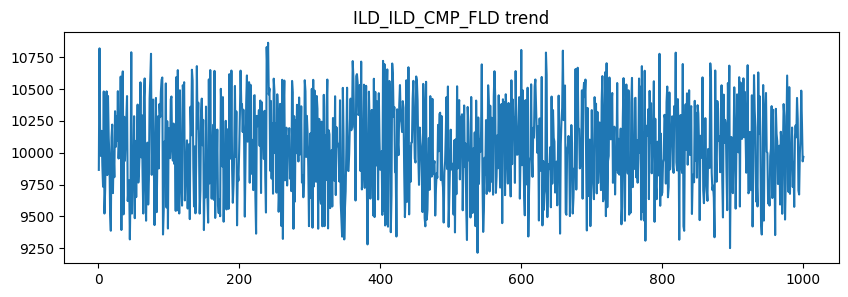

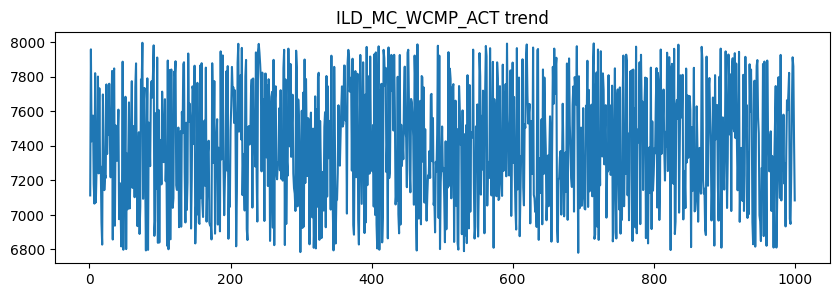

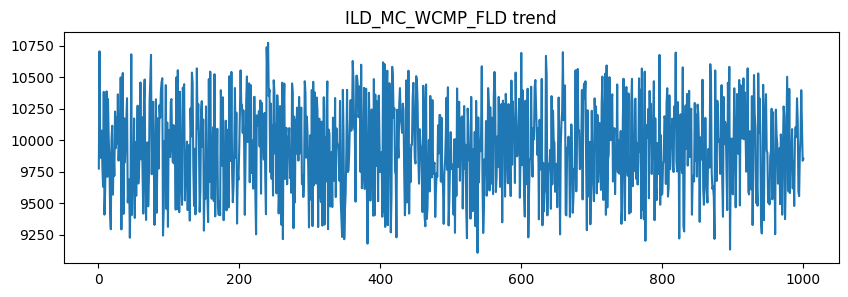

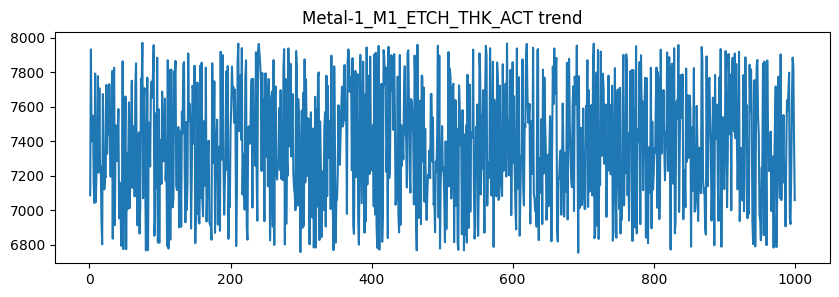

In [ ]:
# 정답 기입 - 제출시 출력물은 숨기기(ctrl+M+O) 후 pdf로 제출
for col in df3t.columns[3:]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3t[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

In [ ]:
# 이상 trend를 보이는 column명 기입
# 별다른 이상 trend가 보이지 않음

## 1-5) 시트별 Trend 그래프 : df3f

In [ ]:
# 정답 기입 - 제출시 출력물은 숨기기(ctrl+M+O) 후 pdf로 제출
for col in df3f.columns[3:]:
    plt.figure(figsize=(10, 3)) #사이즈지정
    plt.plot(df3f[col])
    plt.title(f'{col} trend') # 차트제목
    plt.show() # 차트출력

Output hidden; open in https://colab.research.google.com to view.

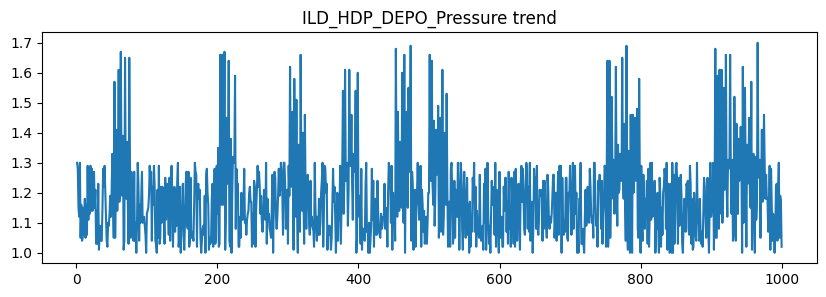

In [ ]:
# 이상 trend를 보이는 column명 기입
# Metal-1_M1_ETCH_Temp_trend
plt.figure(figsize=(10, 3))
plt.plot(df3f['ILD_HDP_DEPO_Pressure'])
plt.title(f'ILD_HDP_DEPO_Pressure trend')
plt.show()

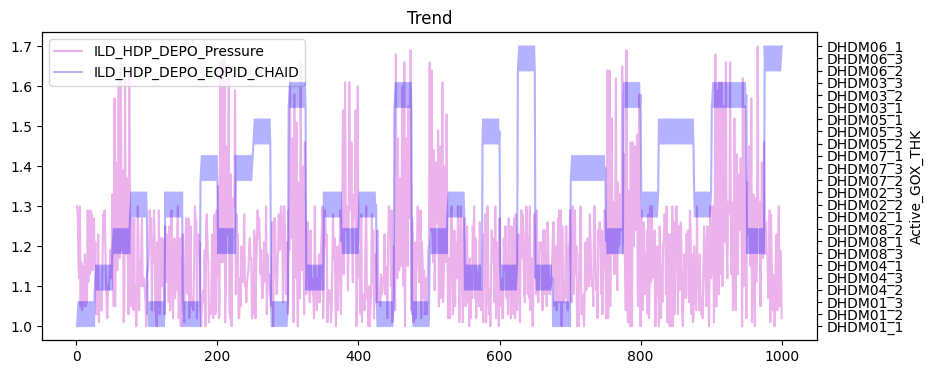

In [40]:
figure, ax1 = plt.subplots(figsize = (10,4))
# figure, fig, f 중 사용
# 왼쪽 y축
line1 = ax1.plot(df3f['ILD_HDP_DEPO_Pressure'], color='m'
                ,alpha = 0.3 # 투명도
                ,label=f'ILD_HDP_DEPO_Pressure' # 범례 라벨
                )
# ax1.set_ylim(60, 90) #ylim(최소값,최대값)

# 오른쪽 Y축
ax2 = ax1.twinx()
line2 = ax2.plot(df3f['ILD_HDP_DEPO_EQPID_CHAID'],color='b'
                ,alpha = 0.3 # 투명도
                ,label='ILD_HDP_DEPO_EQPID_CHAID' #범례 라벨
                )
ax2.set_ylabel('Active_GOX_THK')


#범례추가: 각 Plot의 label 명칭 자동으로 가져옴
lines = line1 + line2
labels = [ln.get_label() for ln in lines]
# labels = ['BIN1', 'GPY_ETCH_Temp']
ax1.legend(lines, labels, loc='upper left')
# ax1.legend(labels, loc='upper left')
# ax2.legend(labels, loc='upper right')
plt.title('Trend')
plt.show()

# 문제 2) 수율이 낮은 LOTID 확인
* 문제1에서 Yield(df3y)에서 수율이 특정 구간에서 낮아지는 것을 확인했다. 어떤 LOTID 에서 수율이 낮아지는지 확인하여라.

## 문제 2-1) LOTID 별 양품비율(BIN1)의 평균값 계산하기
* groupby() 활용

In [ ]:
# 정답 기입
df3y.groupby('LOTID')['BIN1_Prime'].mean()

LOTID
YJ209.1    78.11420
YJ210.1    76.77616
YJ213.1    76.42184
YJ215.1    78.22232
YJ216.1    78.08616
YJ218.1    77.05400
YJ223.1    77.94432
YJ224.1    76.88624
YJ225.1    77.46832
YJ227.1    77.03320
YJ230.1    77.58812
YJ231.1    76.87484
YJ232.1    76.76500
YJ234.1    78.03972
YJ235.1    77.90180
YJ237.1    76.56988
YJ238.1    76.95136
YJ239.1    76.74172
YJ241.1    76.51624
YJ245.1    78.20872
YJ246.1    76.88204
YJ247.1    77.99424
YJ250.1    76.78576
YJ251.1    77.86836
YJ252.1    77.41832
YJ253.1    77.72672
YJ254.1    77.47708
YJ255.1    77.38544
YJ260.1    77.40508
YJ261.1    77.92952
YJ262.1    76.59372
YJ263.1    76.61732
YJ265.1    78.77136
YJ266.1    78.18468
YJ267.1    77.76116
YJ270.1    77.43488
YJ273.1    76.20396
YJ274.1    76.73296
YJ275.1    76.69792
YJ276.1    77.94452
Name: BIN1_Prime, dtype: float64

## 문제 2-2) LOTID 별 수율(BIN1)의 평균값을 막대프로 나타내기

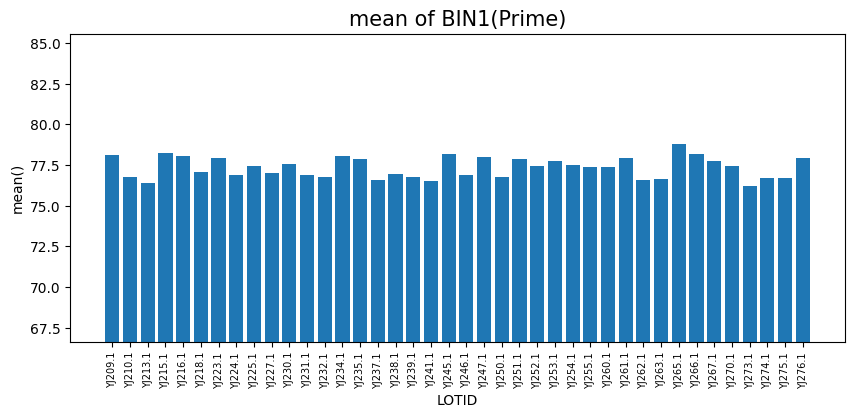

In [ ]:
# 정답 기입
gr = df3y.groupby('LOTID')['BIN1_Prime'].mean()
plt.figure(figsize = (10,4))
plt.bar(gr.index, gr.values)
plt.xlabel('LOTID')
plt.ylabel('mean()')
plt.title('mean of BIN1(Prime)', fontsize = 15)
plt.xticks(fontsize = 7, rotation = 90)
plt.ylim(60,90)
plt.ylim(df3y['BIN1_Prime'].min(), df3y['BIN1_Prime'].max())
plt.show()

In [ ]:
# 수율이 낮은 LOTID 4개는 무엇인가?
#YJ238.1 , YJ247.1 , YJ265.1 , YJ273.1

# 문제3) 설비상 문제 확인
* Yield sheet 외에 다른 sheet에서 이상 trend를 확인해보면 photo layer 'Metal-1'에서 문제가 있는 것을 확인할 수 있었다.
* Metal-1의 설비상 문제가 있지는 않은지 'Metal-1_M1_ETCH_EQPID_CHAID' 별 boxlot으로 확인하고 어떤 설비의 챔버에서 문제가 있는지 확인하여라.
* ex) 'Metal-1_M1_ETCH_EQPID_CHAID'별 'Metal-1_M1_ETCH_Temp' boxplot 시각화

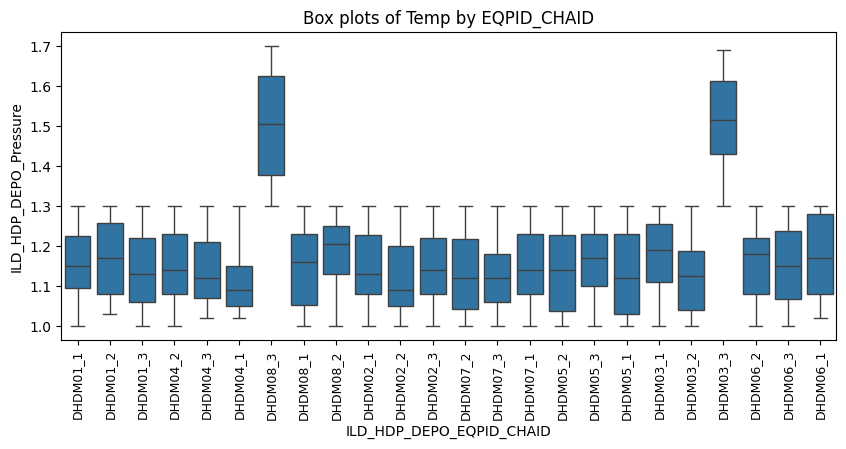

In [41]:
plt.figure(figsize = (10,4))
sns.boxplot(x='ILD_HDP_DEPO_EQPID_CHAID', y='ILD_HDP_DEPO_Pressure', data=df3f)
plt.title('Box plots of Temp by EQPID_CHAID')
plt.xticks(rotation=90, fontsize = 9)
plt.show()

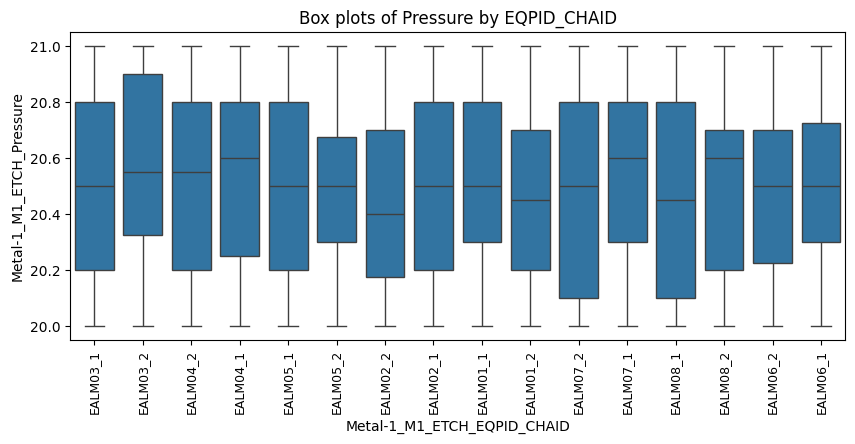

In [ ]:

plt.figure(figsize = (10,4))
sns.boxplot(x='Metal-1_M1_ETCH_EQPID_CHAID', y='Metal-1_M1_ETCH_Pressure', data=df3f)
plt.title('Box plots of Pressure by EQPID_CHAID')
plt.xticks(rotation=90, fontsize = 9)
plt.show()

In [ ]:
# 이상값이 측정되는 설비 및 챔버 정보는 무엇인가?
#EALM02_1 의 설비 및 챔버가 Temp값에서 다른 chamber 와다르게 최댓값이 다른 chamber와 다르게 큰것을 확인 할 수 있다.
